In [63]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk

In [15]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = label

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [118]:

folder_path = "D:\\Минин\\Converted\\Belskaya"

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

['D:\\Минин\\Converted\\Belskaya\\BNTM-349 UV.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNTM-349.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNTM-418 UV.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNTM-477 UV.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNTM-495.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNTM-494.xlsx', 'D:\\Минин\\Converted\\Belskaya\\BNAB-110.xlsx']


In [126]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   file_raw = pd.read_excel(file) 

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

print(data_pd)

       OD Cell_type    Substance Concentration
0   0.461      Vero  BNTM-349 UV          10-4
1   0.261      Vero  BNTM-349 UV          10-4
2   0.520      Vero  BNTM-349 UV          10-4
3   0.630      Vero  BNTM-349 UV          10-4
4   0.563      Vero  BNTM-349 UV          10-4
..    ...       ...          ...           ...
19    NaN      Vero     BNAB-110       Control
20    NaN      Vero     BNAB-110       Control
21    NaN      Vero     BNAB-110       Control
22    NaN      Vero     BNAB-110       Control
23    NaN      Vero     BNAB-110       Control

[672 rows x 4 columns]


<AxesSubplot: xlabel='Substance', ylabel='OD'>

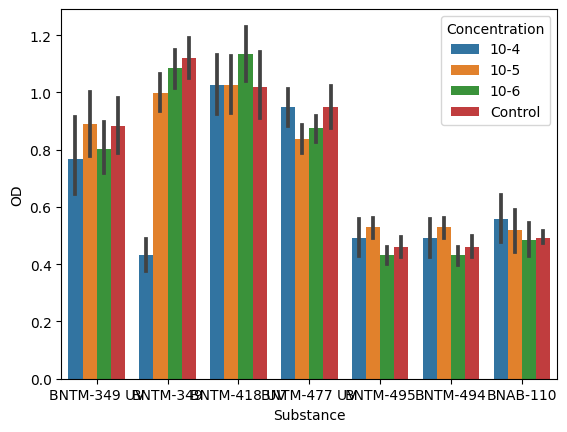

In [127]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Recalculation to relative values:

In [128]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD   Relative    Substance Concentration Cell_type
0   0.461  52.312057  BNTM-349 UV          10-4      Vero
1   0.261  29.617021  BNTM-349 UV          10-4      Vero
2   0.520  59.007092  BNTM-349 UV          10-4      Vero
3   0.630  71.489362  BNTM-349 UV          10-4      Vero
4   0.563  63.886525  BNTM-349 UV          10-4      Vero
..    ...        ...          ...           ...       ...
19    NaN        NaN     BNAB-110       Control      Vero
20    NaN        NaN     BNAB-110       Control      Vero
21    NaN        NaN     BNAB-110       Control      Vero
22    NaN        NaN     BNAB-110       Control      Vero
23    NaN        NaN     BNAB-110       Control      Vero

[672 rows x 5 columns]


C:\Users\Modern\AppData\Local\Temp\ipykernel_16632\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_16632\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_16632\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [129]:
unique_concentrations= data['Concentration'].unique()
unique_substances= data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))

print(pairs)


[(('BNTM-349 UV', '10-4'), ('BNTM-349 UV', 'Control')), (('BNTM-349 UV', '10-5'), ('BNTM-349 UV', 'Control')), (('BNTM-349 UV', '10-6'), ('BNTM-349 UV', 'Control')), (('BNTM-349 UV', 'Control'), ('BNTM-349 UV', 'Control')), (('BNTM-349', '10-4'), ('BNTM-349', 'Control')), (('BNTM-349', '10-5'), ('BNTM-349', 'Control')), (('BNTM-349', '10-6'), ('BNTM-349', 'Control')), (('BNTM-349', 'Control'), ('BNTM-349', 'Control')), (('BNTM-418 UV', '10-4'), ('BNTM-418 UV', 'Control')), (('BNTM-418 UV', '10-5'), ('BNTM-418 UV', 'Control')), (('BNTM-418 UV', '10-6'), ('BNTM-418 UV', 'Control')), (('BNTM-418 UV', 'Control'), ('BNTM-418 UV', 'Control')), (('BNTM-477 UV', '10-4'), ('BNTM-477 UV', 'Control')), (('BNTM-477 UV', '10-5'), ('BNTM-477 UV', 'Control')), (('BNTM-477 UV', '10-6'), ('BNTM-477 UV', 'Control')), (('BNTM-477 UV', 'Control'), ('BNTM-477 UV', 'Control')), (('BNTM-495', '10-4'), ('BNTM-495', 'Control')), (('BNTM-495', '10-5'), ('BNTM-495', 'Control')), (('BNTM-495', '10-6'), ('BNTM-495

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BNTM-349 UV_Control vs. BNTM-349 UV_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
BNTM-349_Control vs. BNTM-349_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
BNTM-418 UV_Control vs. BNTM-418 UV_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
BNTM-477 UV_Control vs. BNTM-477 UV_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
BNTM-495_Control vs. BNTM-495_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=7.200e+01
BNTM-494_Control vs. BNTM-494_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e

(<AxesSubplot: xlabel='Substance', ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x261ac9d6770>])

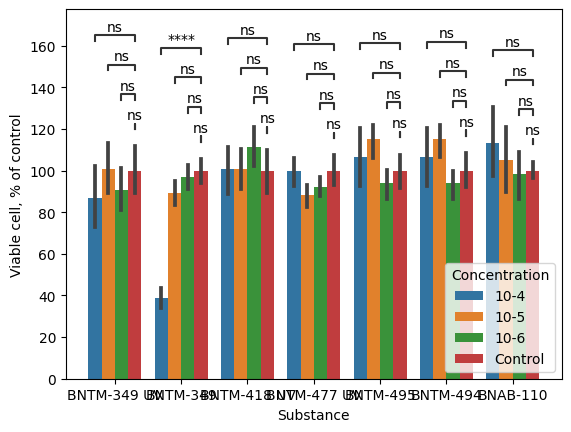

In [130]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration')
ax.set(xlabel='Substance', ylabel='Viable cell, % of control')

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

